In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## 2.1 실제 데이터로 작업하기

유명한 공개 데이터 저장소
- UC얼바인 : http://archive.ics.uci.edu/ml
- 캐글 : http://kaggle.com/datasets
- 아마존 aws : http://aws.amazon.com/ko/datasets

메타 포털
- http://dataportals.org
- http://opendatamonitor.eu/
- http://quandl.com

인기있는 공개 데이터 저장소가 나열되어 있는 페이지
- 위키백과 머신러닝 데이터셋 목록 http://goo.gl/SJHN2k
- Quora.com 질문 http://goo.gl/zDR78y
- 데이터셋 서브레딧 http://www.reddit.com/r/datasets

이 장에서는 StatLib 저장소의 캘리포니아 주택 가격 데이터셋을 사용합니다. 범주형 특성을 추가하고 몇개 특성을 제외 했습니다.

## 2.2 큰 그림 보기

캘리포니아 인구조사 데이터를 사용해 캘리포니아의 주택 가격 모델을 만드는 것입니다. <br>
이 데티어는 캘리포니아의 블록 그룹마다 인국, 중간소득, 중간 주택 가격등을 담고 있습니다. <br>
블록그룹은 미국 인구조사국에서 샘플 데이터를 발표하는 데 사용하는 최소한의 지리적 단위입니다.( 한 불록그룹은 보통 600~3000명의 인구를 나타냅니다.)

이 데이터로 모델을 학습시켜서 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 합니다.

### 2.2.1 문제 정의

첫번째로 해야 할 질문은 '비즈니스의 목적이 정확히 무엇인가요?' 입니다. <br>
문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능지표를 사용할지, 모델 튜닝을 위해 얼마나 노력을 투여할지를 결정할 중요한 질문입니다.

다음으로 할 질문은 '현재 솔루션은 어떻게 구성되어 있나요?'입니다. 이는 문제 해결 방법에 대한 정보는 물론이고 참고 성능으로도 사용 할 수 있습니다.<br>

시스템을 설계할 준비가 되었다면 문제를 정의해야 합니다.<br>
이는 지도학습, 비지도학습, 강화학습 중 무엇일까요? 분류나 회귀인가요 아니면 다른 어떤 작업인가요? 배치 학습과 온라인 학습 중 어느 것을 사용해야 하나요?<br>
위 질문의 답을 찾고 설계를 진행해야 합니다.

레이블된 훈련 샘플이 있으니 이는 전형적인 지도 학습 작업입니다. 또 한 값을 예측해야 하므로 전형적인 회귀문제입니다. <br>
좀 더 구체적으로는 예측에 사용할 특성이 여러 개이므로 다변량 회귀문제입니다.<br>

### 2.2.2 성능 측정 지표 선택

성능 측정 지표를 선택하는 것입니다. 회귀 문제의 전형적인 성능 지표는 평균 제곱근 오차(Root Mean Square Error)입니다.<br>
오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오류가 있는지 가늠하게 해줍니다.

$$
RMSE(X, h) = \sqrt{\dfrac{1}{m} \sum^m_{i=1} (h(x^{(i)})-y^{(i)})^2 }
$$

**표기법**

$
\mathbf{x}^{(1)}  = \begin{bmatrix} -118.29 \\ 33.91 \\ 1416 \\ 38372 \\ \end{bmatrix} \\ 
\mathbf{X} = \begin{bmatrix} 
(\mathbf{X}^{(1)})^T  \\ (\mathbf{X}^{(2)})^T \\ \vdots \\ (\mathbf{X}^{(m)})^T 
\end{bmatrix} =
\begin{bmatrix}
-118.29 & 33.91 & 1416 & 38372 \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix}
$

RMSE가 일반적으로 회귀 문제에 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수 있습니다. 예를 들어 이상치로 보이는 구역이 많다고 가정합시다. 이런 경우에는 평균 절대 오차(Mean Absolute Error)를 고려해 볼 수 있습니다.

$$
MAE(X, h) = \dfrac{1}{m} \sum^m_{i=1} |h(X^{(i)}-y^{(i)} |
$$

RMSE, MAE 모두 예측값의 벡터와 타깃값의 벡터 사이의 거리를 재는 방법입니다. 거리 측정에는 여러 가지 방법(norm)이 가능합니다.<br>

- RMSE는 유클리디안 놈(Euclidian Norm)에 해당합니다. 우리와 친숙한 거리개녑입니다. $ l_2$  놈이라고 부르며 $\Vert A \Vert_2 $ 또는 그냥 $\Vert A \Vert $로 표기합니다

- 절대값의 합을 계산하는 것은 $l_1$ 놈에 해당하며 $\Vert A \Vert_1 $ 로 표기합니다. <br>
이는 도시의 구획이 지각으로 나뉘어 있을 때 도시의 두 지점 사이의 거리를 측정하는 것과 같아 맨하튼 놈 이라고도 합니다.

- 일반적으로 원소가 n개인 벡터 $v$의 $l_k$ 놈은 $\Vert A \Vert_k =( |v_0|^k + |v_1|^k + \dots + |v_n|^k)^{1/k} $ 로 정의합니다.<br> $l_0$은 단순히 벡터에 있는 0이아닌 원수의 수이고 $l_\infty$ 는 벡터에서 가장 큰 절댓값이 됩니다.

- 놈의 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시됩니다. 그래서 RMSE가 MAE보다 조금 더 이상치에 민감합니다.<br>
하지만 이상치가 매우 드믈면(정규분포) RMSE가 잘 맞아 일반적으로 널리 사용됩니다.

### 2.2.3 가정 검사

In [6]:

housing = pd.read_csv('datasets/housing/housing.csv')

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


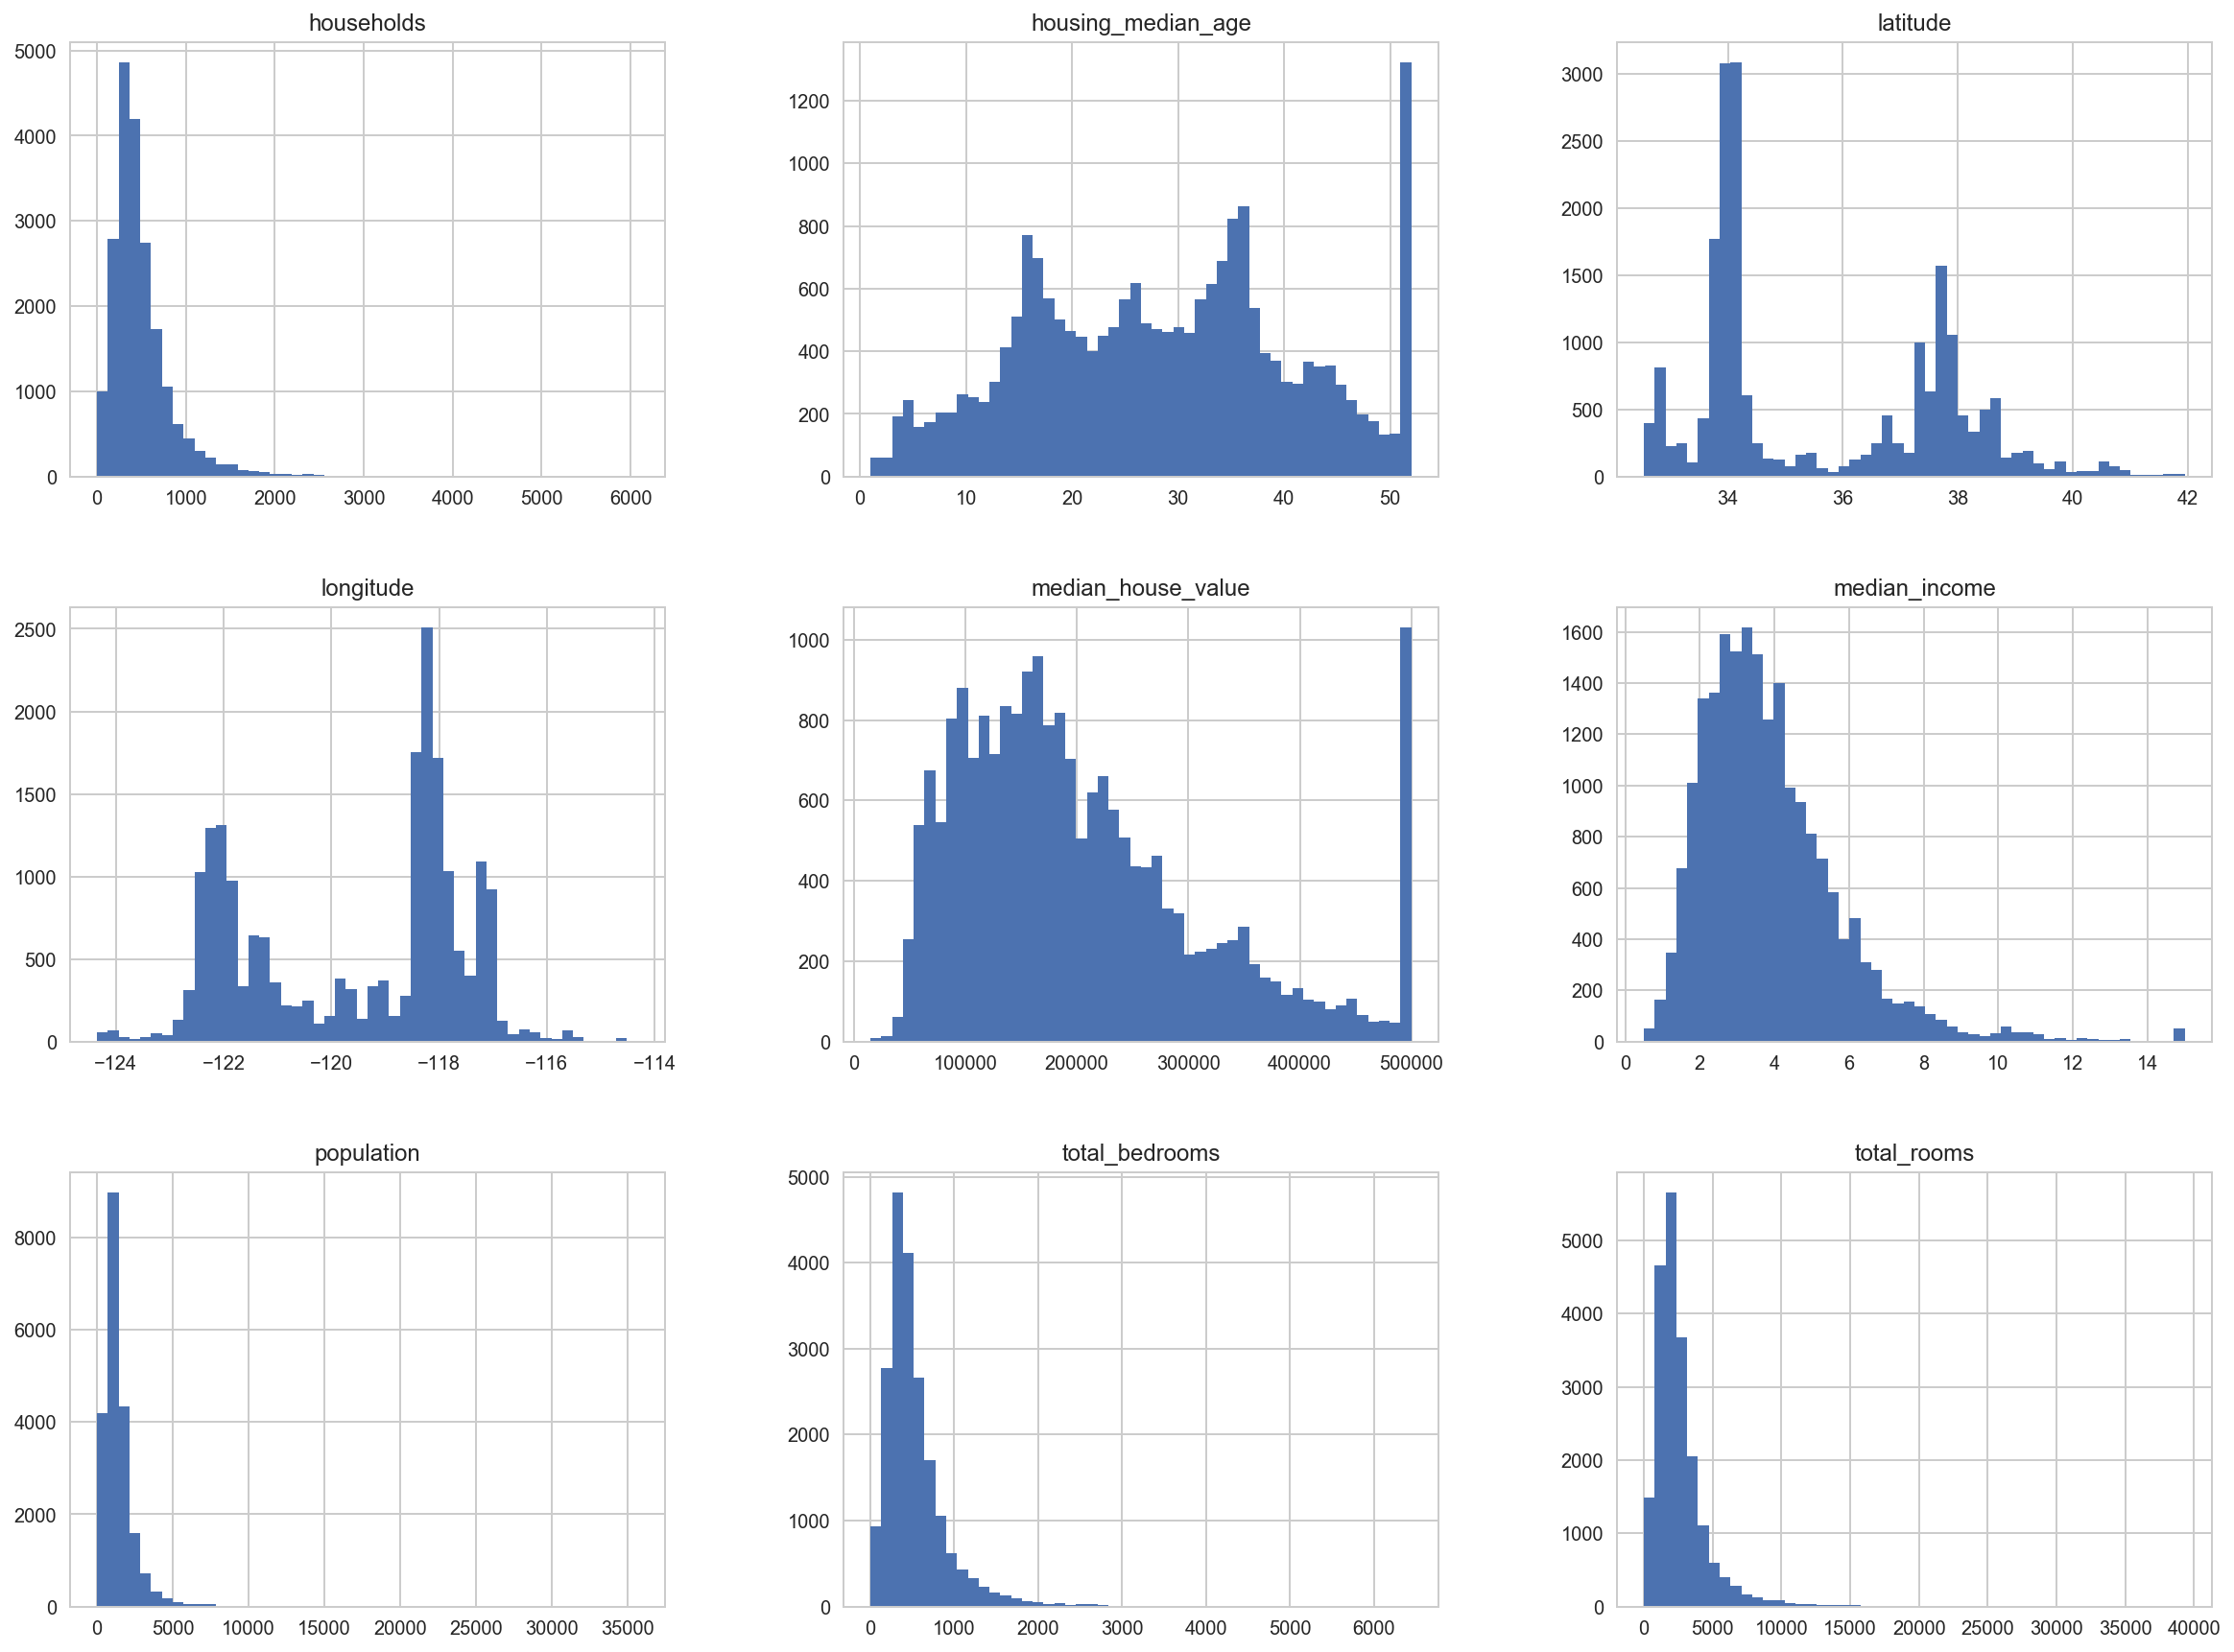

In [12]:
housing.hist(bins=50, figsize=(20, 15));

- median_income특성이 us달러로 표현되어 있지 않은 것 같다. 최소를 0.5 최대를 15로 정규화 전처리가 되어있다.
- housing_median_age, median_house_value역시 최대값과 최소값을 한정했다
    - 


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
len(housing)

20640

In [18]:
len(train_set), len(test_set)

(16512, 4128)

In [25]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat']<5, 5.0, inplace=True)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [36]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [37]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(columns='income_cat', axis=1, inplace=True)

In [72]:
housing.drop(columns='income_cat', inplace=True)

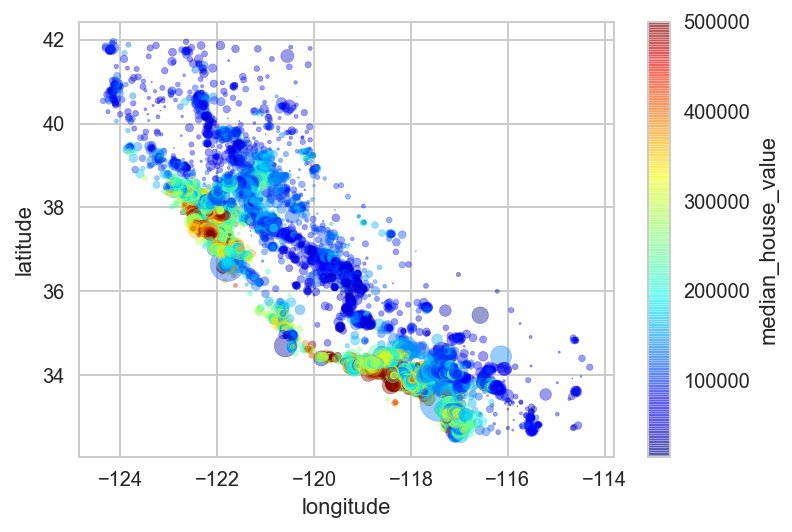

In [73]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            c='median_house_value', s=housing['population']/100, cmap=plt.get_cmap('jet'), colorbar=True, sharex=False);

원의 크기는 인구, 색상은 집가격

In [74]:
corr_matrix= housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [75]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [76]:
attributes=['median_income','median_house_value','housing_median_age','total_rooms']

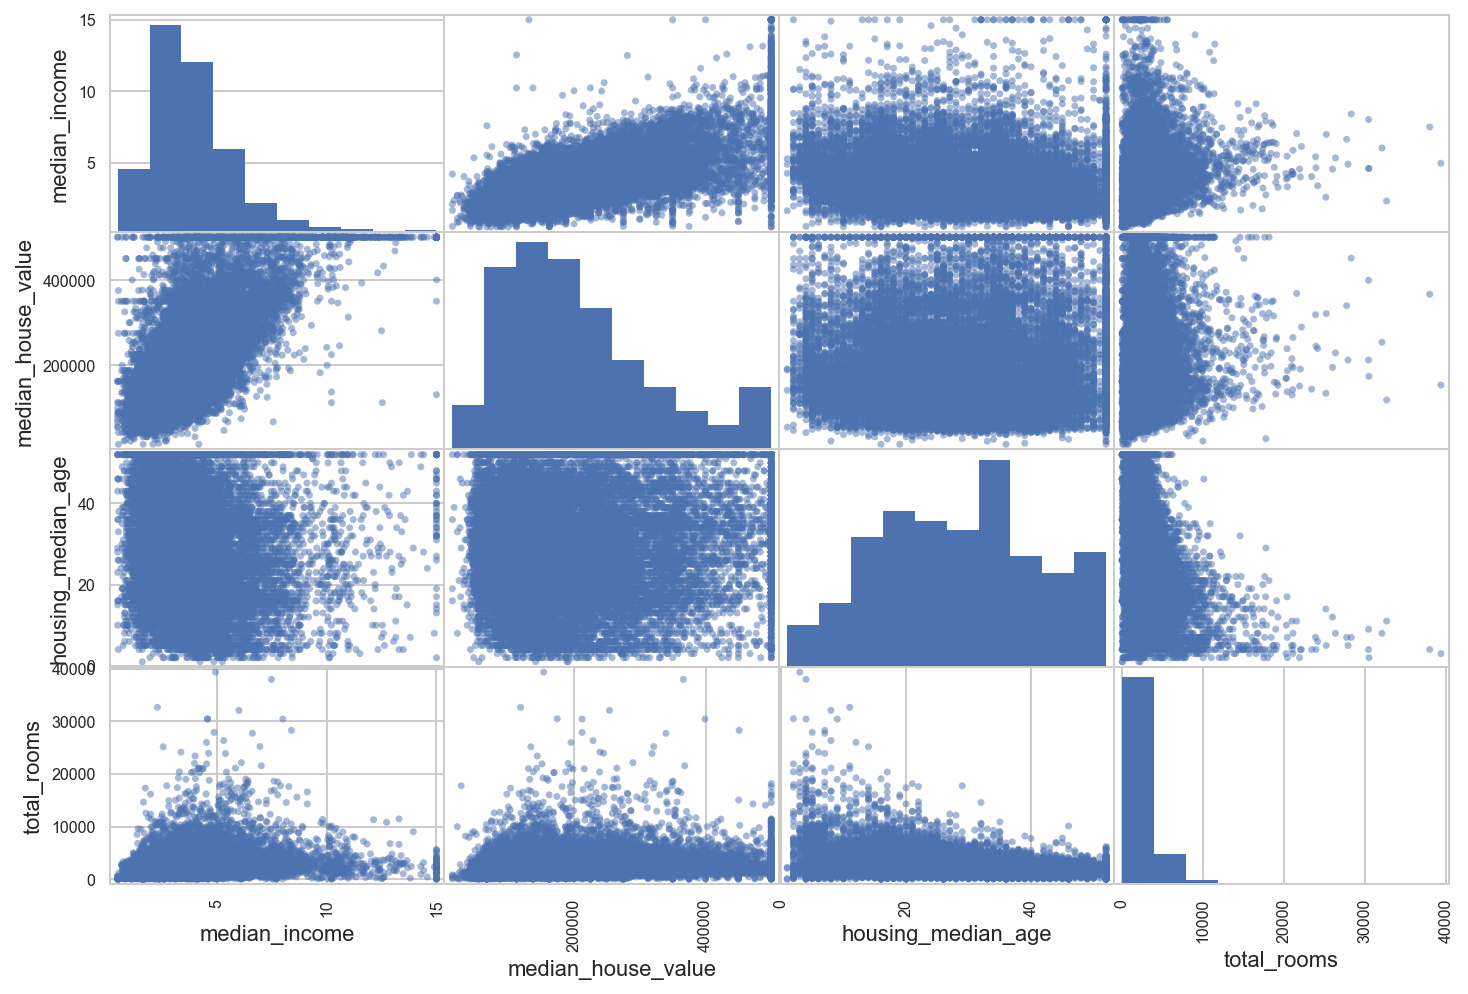

In [77]:
pd.scatter_matrix(housing[attributes], figsize=(12, 8));

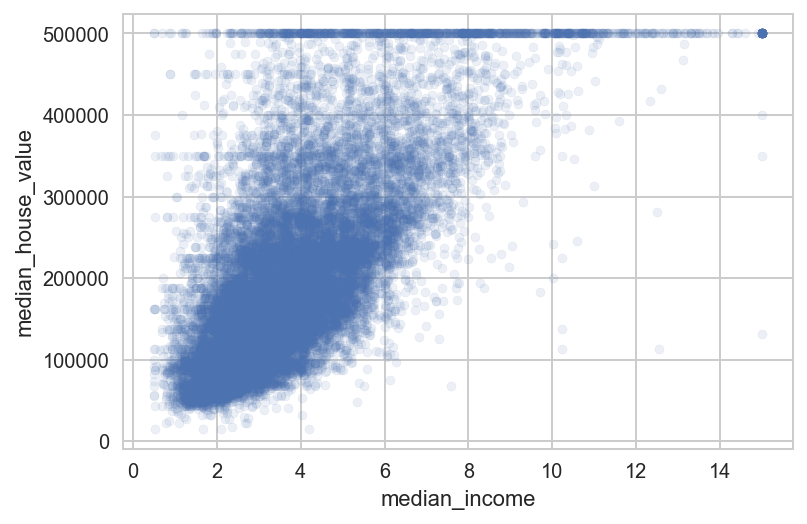

In [78]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

In [79]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [80]:
corr_matrix= housing.corr()
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [81]:
housing = strat_train_set.drop(columns=['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [85]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.9+ MB


In [86]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [87]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [90]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [91]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [92]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [93]:
X = imputer.transform(housing_num)

In [155]:
housing_num.shape

(16512, 8)

In [98]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=list(housing_num.index.values))

In [99]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [100]:
housing_cat = housing['ocean_proximity']

In [102]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [103]:
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3])

In [104]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [107]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [108]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [114]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [179]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household =      X[:, rooms_ix]      / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [180]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [181]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [182]:
housing_extra_attribs.shape

(16512, 11)

In [193]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [184]:
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [185]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [211]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [212]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [213]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_addr', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', CategoricalEncoder(encoding='onehot-dense'))
])

In [214]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [215]:
housing_prepared = full_pipeline.fit_transform(housing)

In [216]:
housing_prepared.shape

(16512, 16)

In [217]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [218]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [219]:
some_data_prepared = full_pipeline.transform(some_data)

In [220]:
lin_reg.predict(some_data_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849878])

In [221]:
list(some_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [222]:
from sklearn.metrics import mean_squared_error

In [223]:
housing_predictions = lin_reg.predict(housing_prepared)

In [228]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [229]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [231]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [232]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=18)

In [233]:
tree_rmse_scores = np.sqrt(-scores)

In [234]:
tree_rmse_scores

array([69571.19808424, 63046.16216255, 66615.03769008, 73246.59387737,
       68268.49251278, 71559.00987711, 70513.806681  , 76569.33769227,
       64027.48824078, 76446.32226634, 70468.74913018, 74378.53783693,
       64629.70473362, 67859.56190565, 73753.10346939, 78338.61112686,
       70468.94862435, 72980.92063332])

In [235]:
tree_rmse_scores.mean()

70707.86591915708

In [236]:
tree_rmse_scores.std()

4302.004820936592

In [237]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)

In [238]:
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([66782.73843989, 66960.118071  , 70361.18285107, 74742.02956966,
       68022.09224176, 71193.07033936, 64969.63056405, 68276.69992785,
       71543.69797334, 67665.10082067])

In [240]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [241]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([51679.6030682 , 50988.35093855, 54007.66710847, 54501.86713294,
       53118.20906937, 56970.64650866, 51964.84976903, 51433.41305165,
       56578.38535835, 52652.55515221])

In [242]:
forest_rmse_scores.mean()

53389.55471574325

In [243]:
from sklearn.model_selection import GridSearchCV

In [245]:
param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2,3,4]},
]

In [246]:
forest_reg = RandomForestRegressor()

In [247]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)

In [248]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [249]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [250]:
cvres = grid_search.cv_results_

In [251]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65011.562568899215 {'max_features': 2, 'n_estimators': 3}
55642.159050454895 {'max_features': 2, 'n_estimators': 10}
52869.88594260961 {'max_features': 2, 'n_estimators': 30}
60538.05698149475 {'max_features': 4, 'n_estimators': 3}
52917.958934071976 {'max_features': 4, 'n_estimators': 10}
50353.66913691527 {'max_features': 4, 'n_estimators': 30}
59332.35083877537 {'max_features': 6, 'n_estimators': 3}
52035.82103575202 {'max_features': 6, 'n_estimators': 10}
49934.488553900475 {'max_features': 6, 'n_estimators': 30}
59124.41270859495 {'max_features': 8, 'n_estimators': 3}
52163.17433832687 {'max_features': 8, 'n_estimators': 10}
50105.70876364343 {'max_features': 8, 'n_estimators': 30}
63821.24675822948 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54433.275880134264 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59785.91405038443 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52488.70336041726 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [258]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  13.7s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  13.8s
[CV] ............................ C=10.0, kernel=linear, total=  13.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=  13.9s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=  13.2s
[CV] C=30.0, ke

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min


[CV] ......................... C=10000.0, kernel=linear, total=  16.0s
[CV] C=30000.0, kernel=linear ........................................
[CV] ......................... C=30000.0, kernel=linear, total=  26.9s
[CV] C=30000.0, kernel=linear ........................................
[CV] ......................... C=30000.0, kernel=linear, total=  26.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ......................... C=30000.0, kernel=linear, total=  26.8s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ......................... C=30000.0, kernel=linear, total=  25.4s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ......................... C=30000.0, kernel=linear, total=  22.6s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=1.0, gamma=0.01, kernel=rbf, total=  17.4s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] .

KeyboardInterrupt: 

In [252]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11db60748>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x120e9f908>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [255]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [256]:
rnd_search.best_score_

-2415442590.723916

In [253]:
cvres = rnd_search.cv_results_

In [254]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}
